<a href="https://colab.research.google.com/github/jocelynbaduria/Assignment-3-_part_a_b_c.ipynb/blob/main/Jocelyn_Baduria_Assignment_3_part_c2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C2. Tensorflow
With auto differentiation 

In [1]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [2]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [3]:
!pip3 install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 89kB/s 
     |████████████████████████████████| 450kB 45.7MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 3.8MB 18.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=8677a6b6f114899a59a3c49097417e5f1dd9d2834d4b8f4cd290aa3a12610dd0
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstal

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import random
import matplotlib.pyplot as plt

%matplotlib inline
tf.__version__

'2.0.0'

1. Generate data: 3 dimensions input and 2 dimensions output 


> Utility functions



In [25]:
input_dim = 3
output_dim = 2
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
  return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
  with tf.GradientTape() as tape:
    predictions = compute_predictions(x)
    loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
    dloss_dw, dloss_db = tape.gradient(loss, [w, b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

In [26]:
# x, y

Let's generate some artificial data to demonstrate our model:

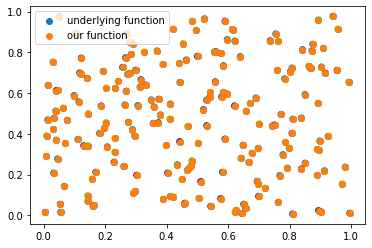

In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# # # Make non-linear data, using 3 dimensional input data and 2 output neurons
n = 200
d1 = 3
d2 = 2
x = tf.Variable(tf.random.uniform(shape=(n, d1)))
y = tf.Variable(tf.random.uniform(shape=(n, d2)))

y_true = tf.matmul(tf.pow(x,2), w) + tf.matmul(x, w) + b
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.scatter(x[:, 0], x[:, 1], label='underlying function')
if y_true is not None:
  plt.scatter(x[:, 0], x[:, 1], label='our function')
  plt.legend()

2. Train the model and compute the cost function for each epoch

In [28]:
# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.5360
Epoch 1: last batch loss = 0.5235
Epoch 2: last batch loss = 0.5114
Epoch 3: last batch loss = 0.4997
Epoch 4: last batch loss = 0.4884
Epoch 5: last batch loss = 0.4775
Epoch 6: last batch loss = 0.4670
Epoch 7: last batch loss = 0.4568
Epoch 8: last batch loss = 0.4470
Epoch 9: last batch loss = 0.4375


3. Compute the Model predictions

In [29]:
predictions = compute_predictions(x)

Plot the prediction

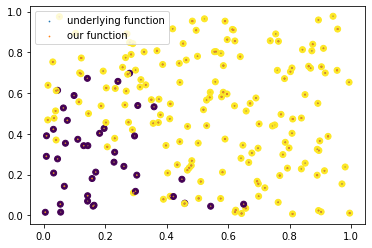

In [30]:
plt.scatter(x[:, 0], x[:, 1], c=predictions[:, 0] > 0.5)
plt.scatter(x[:, 0], x[:, 1], x[:, 2], label='underlying function')
if y_true is not None:
  plt.scatter(x[:, 0], x[:, 1], x[:, 2], label='our function')
  plt.legend()

4. Add ReLu function to learn the non-linear data

In [36]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def train_on_batch(x, y):
      with tf.GradientTape() as tape:
        predictions = compute_predictions(x)
        loss = compute_loss(y, predictions)
      # Note that `tape.gradient` works with a list as well (w, b).
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
        w.assign_sub(learning_rate * dloss_dw)
        b.assign_sub(learning_rate * dloss_db)
        return loss


relu = Relu()
input_ = tf.nn.relu([1, 0.5, 0, -0.5, -1]).numpy()
print(relu(input_))

[1.  0.5 0.  0.  0. ]


5. Train the 3dim and 2output generated data with Relu function

In [37]:
for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    relu = Relu()
    # loss = train_on_batch(x, y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.4375
Epoch 1: last batch loss = 0.4375
Epoch 2: last batch loss = 0.4375
Epoch 3: last batch loss = 0.4375
Epoch 4: last batch loss = 0.4375
Epoch 5: last batch loss = 0.4375
Epoch 6: last batch loss = 0.4375
Epoch 7: last batch loss = 0.4375
Epoch 8: last batch loss = 0.4375
Epoch 9: last batch loss = 0.4375


6. Fit the model again


In [38]:
predictions = compute_predictions(x)

7. Plot the output post training as well as the real data  using tsne. Result: Similar plots but different values

In [39]:
import numpy as np
from sklearn.manifold import TSNE

view = TSNE(n_components=3, perplexity=10,learning_rate=200,random_state=123).fit_transform(x, predictions)

def plot_tsne(x, y_true, predictions):
  plt.figure(figsize=(10,7))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  # plt.plot(x, y_true[:,0], y_true[:,0], color='blue', alpha=0.5, label='True Value')
  plt.legend()

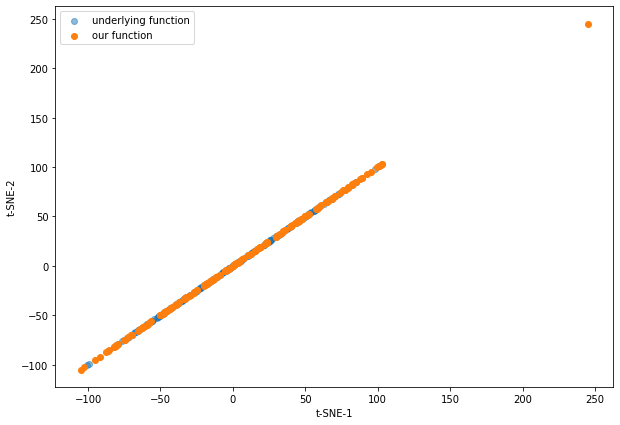

In [40]:
plot_tsne(x, y, predictions)